# Artificial Intelligence — Lab — Exercise 03 — Question 1

#### 08 September 2020

Centre for a Set of Points
<ul>
<li>Points A, B, C, D, E</li>
<li>Find a centre point to these points.</li>
<li>Total distance of centre from all the points is minimum.</li>
<li>Implement and test a hill-climbing method to find the centre for the set of points.</li>
</ul>

In [1]:
import matplotlib.pyplot as plt

In [2]:
class Point:
    """Class to work with a Point (x, y) and its related functions. """
    
    def __init__(self, name, x, y):
        """Define a Coordinate (X, Y) with a name. """
        
        self.name = name
        self.x = x
        self.y = y
        
    def __str__(self):
        """Returns the Point's Name and Coordinates in a formatted manner. """
        
        return self.name + "(" + str(self.x) + ", " + str(self.y) + ")"
        
    def manhattan_distance(self, p):
        """Find the Manhattan distance between the point and another point P. """
        
        md = abs(self.x - p.x) + abs(self.y - p.y)
        return md
    

In [3]:
class Hill_Climb:
    """Class to work with the Hill-Climbing algorithm and its related functionalities."""
    
    def __init__(self, points):
        """Define the points for hill climbing algorithm. """
        
        self.points = points
        self.centre = Point('O', 0, 0)
        #Approximate centroid point, can also use this as the initial centre.
        #self.centre.x = sum(point.x for point in points)//len(points)
        #self.centre.y = sum(point.y for point in points)//len(points)
        

    def manhattan_sum(self, centre):
        """Find the Manhattan distance sum between a given point and all the other points. """
        
        ms = sum(centre.manhattan_distance(point) for point in self.points)
        return ms

    def find_centre_point(self):
        """Finds the most appropriate centre point for the given set of points. """
        
        current_ms = self.manhattan_sum(self.centre)
        t = Point('O', 0, 0)
        
        print("Initial Centre\t\t:\t", self.centre)
        print("Initial Manhattan Sum\t:\t", current_ms)
        
        self.centres = [Point('O', self.centre.x, self.centre.y)]
        
        while True:
            new_ms = self.manhattan_sum(self.centre)
            
            u = Point('U', self.centre.x, self.centre.y + 1)
            d = Point('D', self.centre.x, self.centre.y - 1)
            l = Point('L', self.centre.x - 1, self.centre.y)
            r = Point('R', self.centre.x + 1, self.centre.y)
            
            neighbors = [u, l, d, r]
            
            for neighbor in neighbors:
                if self.manhattan_sum(neighbor) < new_ms:
                    new_ms = self.manhattan_sum(neighbor)
                    t.x = neighbor.x
                    t.y = neighbor.y
            
            if current_ms > new_ms:
                self.centres.append(Point('O', t.x, t.y))
                self.centre.x = t.x
                self.centre.y = t.y
                current_ms = new_ms

            else:
                break
            
        
        print("\nFinal Centre\t\t:\t", self.centre)
        print("Final Manhattan Sum\t:\t", current_ms)

        return self.centres
    
    def plot_graph(self):
        """Plots the graph of the given points, the intermediate centres and the final centre. """

        fc = self.centres[-1]
        
        plt.plot([p.x for p in self.centres], [p.y for p in self.centres], color = "green", label = "Intermediate Centres")
        plt.scatter([p.x for p in points], [p.y for p in points], color = "blue", label = "Given Points")
        plt.scatter([fc.x], [fc.y], color = "red", label = "Final Centre")
        plt.title("Plot of the Points & Centres")
        plt.legend()
        
        for p in self.points:
            plt.annotate(p.name, (p.x, p.y), ha = "center", xytext = (p.x + 0.25 , p.y))
            
        plt.annotate(fc.name, (fc.x, fc.y), ha = "center", xytext = (fc.x + 0.25 , fc.y))    


		Hill Climbing Algorithm


Given Points		:	 A(0, 6) B(1, 2) C(3, 1) D(7, 0) E(9, 3) 

Initial Centre		:	 O(0, 0)
Initial Manhattan Sum	:	 32

Final Centre		:	 O(3, 2)
Final Manhattan Sum	:	 23


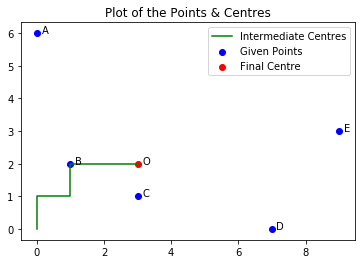

In [4]:
if __name__ == "__main__":
    """Driver program to execute Hill Climbing algorithm for centre points."""
    
    print("\n\t\tHill Climbing Algorithm\n")
    
    a = Point('A', 0, 6)
    b = Point('B', 1, 2)
    c = Point('C', 3, 1)
    d = Point('D', 7, 0)
    e = Point('E', 9, 3)

    points = [a, b, c, d, e]
    
    print("\nGiven Points\t\t:\t", end = " ")
    
    for p in points:
        print(p, end = " ")
        
    print("\n")

    h = Hill_Climb(points)
    h.find_centre_point()
    h.plot_graph()